# Machine Learning - Clustering

El clustering emerge como una técnica que nos permite descubrir patrones ocultos y estructuras subyacentes en conjuntos de datos caóticos, de manera aparente.

## Librerias

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(
    "Mall_Customers.csv"
)


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

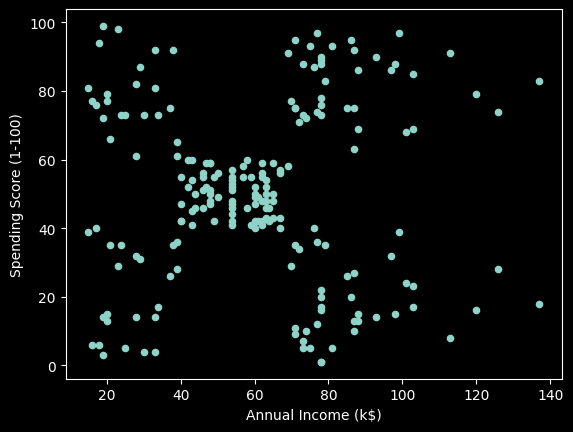

In [6]:
df.plot.scatter(x="Annual Income (k$)", y="Spending Score (1-100)")

## K-Means Clustering


### Método del codo para averiguar el número óptimo de clusters


In [8]:
X = df.iloc[:, [3, 4]].values

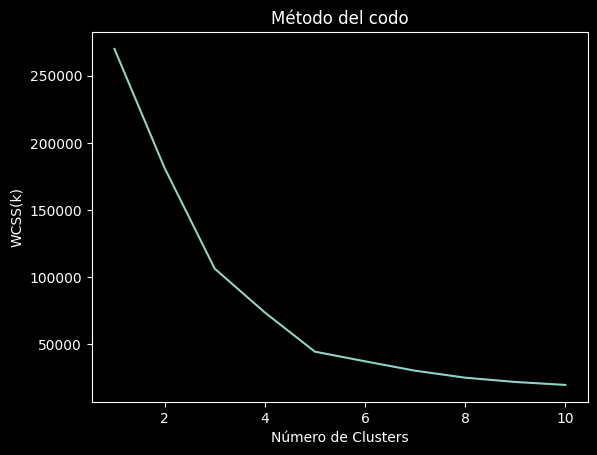

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()


### Aplicar el método de k-means para segmentar el data set


In [14]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

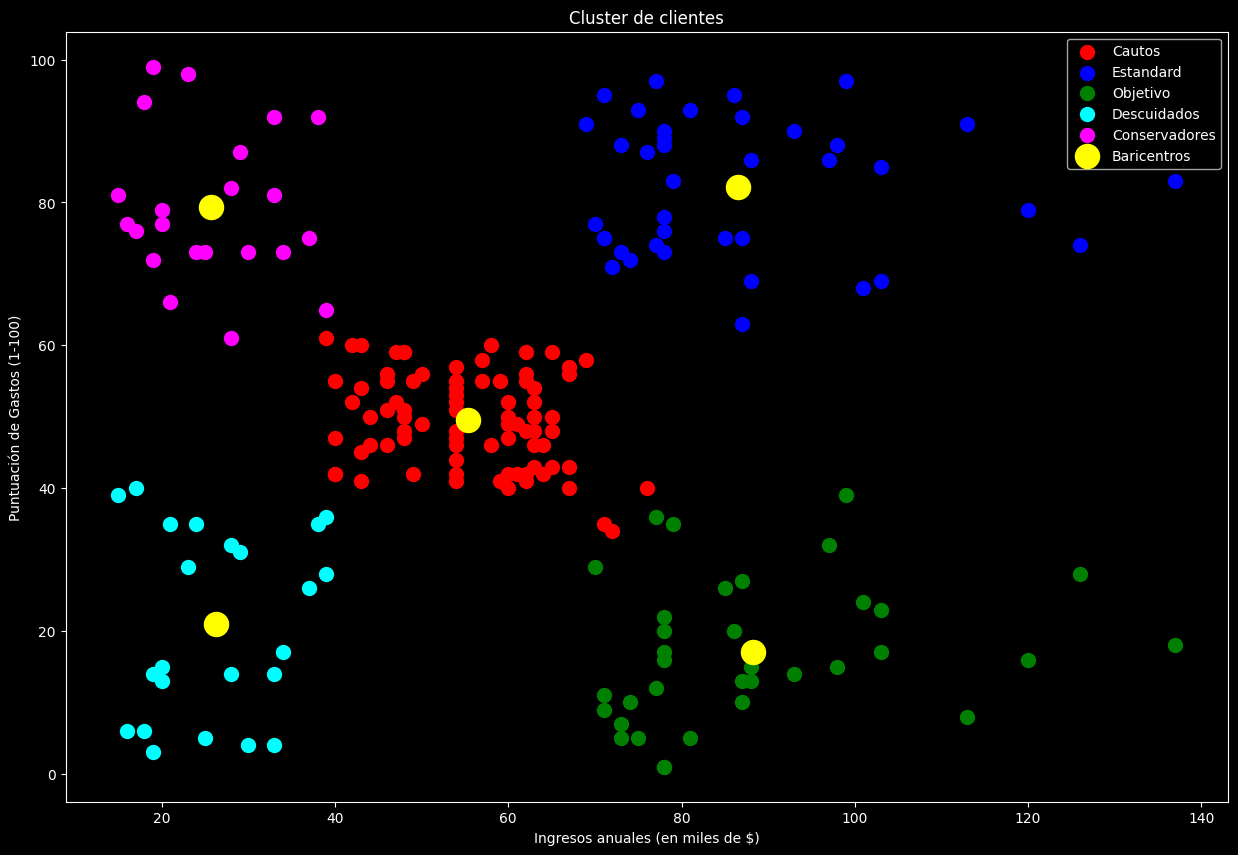

In [13]:
plt.figure(figsize=(15, 10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c="red", label="Cautos")
plt.scatter(
    X[
        y_kmeans == 1, 0
    ],  # Selecciona las coordenadas x (primera columna) de los puntos pertenecientes al clúster 1
    X[
        y_kmeans == 1, 1
    ],  # Selecciona las coordenadas y (segunda columna) de los puntos pertenecientes al clúster 1
    s=100,
    c="blue",
    label="Estandard",
)
plt.scatter(
    X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c="green", label="Objetivo"
)
plt.scatter(
    X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c="cyan", label="Descuidados"
)
plt.scatter(
    X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c="magenta", label="Conservadores"
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="yellow",
    label="Baricentros",
)
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()

### Predecir el cluster según la información dada

In [15]:
anual_income = 120
spending_score = 50

In [20]:
new_point = np.array([[anual_income, spending_score]])
new_point

array([[120,  50]])

In [21]:
predict = kmeans.predict(new_point)
predict

array([2], dtype=int32)